In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

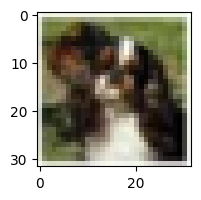

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[500])

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
cnn = models.Sequential([
    # layers.Flatten(input_shape=(32, 32, 3)),
    #cnn
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(5, 5), padding="same", strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    #flatten
    layers.Flatten(),
    #dense network
    layers.Dense(3000, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 3000)             

In [ ]:
cnn.fit(x=x_train, y=y_train, epochs=1)

1563/1563 [==============================] - 260s 166ms/step - loss: 1.2015 - accuracy: 0.5724


In [ ]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.76      0.71      0.74      1000
           2       0.56      0.33      0.42      1000
           3       0.44      0.32      0.37      1000
           4       0.53      0.50      0.51      1000
           5       0.38      0.73      0.50      1000
           6       0.55      0.80      0.65      1000
           7       0.75      0.59      0.66      1000
           8       0.87      0.53      0.66      1000
           9       0.71      0.66      0.69      1000

    accuracy                           0.59     10000
   macro avg       0.62      0.59      0.58     10000
weighted avg       0.62      0.59      0.58     10000



In [ ]:
confusion_matrix()